In [32]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.Container {width:85% !important;}
div.CodeMirror {font-family:Consolas; font-size:13pt; line-height : 140%;}
div.output_area pre {font-family:Consolas; font-size:13pt; line-height : 140%; font-weight : bold;}
div.output_wrapper pre {font-family:Consolas; font-size:13pt; line-height : 140%;}
div.input {font-family:Consolas; font-size:13pt;}
</style>
"""))

<b><font color = "red" size = "6">ch01. NLTK 자연어 처리 패키지</font></b>

# 1절. NLTK 패키지

In [2]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

print(emma[:40])

[Emma by Jane Austen 1816]

VOLUME I

CH


In [7]:
# 문장 단위로 나눠보기 - sent_tokenize() : list로 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)

print('문장 수 :', len(sent_tokens))
print("%r" % (sent_tokens[10]) )

문장 수 : 7493
'It was on the wedding-day\nof this beloved friend that Emma first sat in mournful thought\nof any continuance.'


In [8]:
# 단어 단위로 쪼갠 list 반환 - word_tokenize()
from nltk.tokenize import word_tokenize
print( word_tokenize(sent_tokens[0]) )

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [9]:
# regexpTokenizer 클래스 - 토큰화할 때 정규표현식을 이용할 수 있다.
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[\w]+')

print(ret.tokenize(sent_tokens[0]))

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2절. 형태소 분석
-  형태소 : 의미가 있는 가장 작은 말의 단위<br><br>
- cf. 자연어 처리의 기본은 형태소 분석과 품사 태깅
    - 어간 추출(Stemming)
    - 원형 복원(Lemmatizing)
    - 품사 태깅(Part of Speech Tagging)

In [10]:
words = [ 'sending', 'cooking', 'files', 'lives', 'crying', 'dying' ]

# 어간 추출(1) : PorterStemmer
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem(words[0]), pst.stem(words[1]), pst.stem(words[2])

('send', 'cook', 'file')

In [11]:
[ pst.stem(w) for w in words ]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [12]:
# 어간 추출(2) : LanscasterStemmer
# 어간 추출 기능 중 제일 많이 쓰임
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[ lst.stem(w) for w in words ]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [13]:
# 어간 추출(3) : RegexpStemmer
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[ rst.stem(w) for w in words ]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [14]:
# 어간 추출을 할 경우 의미가 달라질 수 있어 원형복원을 한다.
word2 = [ 'belives', 'cooking' ]
[lst.stem(w) for w in word2]

['bel', 'cook']

In [15]:
# 원형 복원
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()
[ wl.lemmatize(w) for w in word2 ]

['belives', 'cooking']

## 품사 태깅

In [16]:
from nltk.tag import pos_tag
taged_list = pos_tag(word_tokenize(sent_tokens[10]))

print(word_tokenize(sent_tokens[10]))
print('\n품사 태깅 결과\n', taged_list)

['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']

품사 태깅 결과
 [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


# 퀴즈 : emma 소설안에서
<pre>
1. 특수문자가 들어가지 않은 3글자이상의 단어만 추출해서 품사 태깅
2. "Emma" 단어가 몇 번 등장하는지, 품사 태깅이 어떤 품사들도 되어 있는지 모두 출력
3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 개수를 출력
</pre>

## 1번문제

In [17]:
from nltk.tag import pos_tag
from nltk.tokenize import RegexpTokenizer
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
ret = RegexpTokenizer('[\w]{3,}')

emma_tags = pos_tag(ret.tokenize(emma))

In [18]:
print('단어 출현 수 :', len(emma_tags))
print('emma의 글자수 :', len(emma))
print('단어 종류 수:', len(set(emma_tags)))

단어 출현 수 : 123877
emma의 글자수 : 887071
단어 종류 수: 11678


## 2번문제

In [19]:
pos = set() # 품사들
cnt = 0

for emma_t in emma_tags:
    if emma_t[0] == 'Emma':
        cnt += 1
        pos.add(emma_t[1])

# cnt = len([ emma_t[1] for emma_t in emma_tags if emma_t[0] == 'Emma'])
# pos = set([ emma_t[1] for emma_t in emma_tags if emma_t[0] == 'Emma'])

print('출현횟수 :', cnt)
print('분류된 품사 종류 :', pos)

출현횟수 : 865
분류된 품사 종류 : {'VBD', 'NN', 'NNS', 'VBP', 'JJ', 'NNP', 'RB', 'VBN', 'VB', 'NNPS'}


In [20]:
import pandas as pd
pos_cnt = pd.Series([0]*len(pos), index = list(pos))

for emma_t in emma_tags:
    if emma_t[0] == 'Emma':
        pos_cnt[emma_t[1]] += 1
        
pos_cnt

VBD       1
NN        7
NNS       2
VBP       4
JJ        4
NNP     838
RB        1
VBN       1
VB        5
NNPS      2
dtype: int64

## 3번문제 ★

In [21]:
noun_list = [ emma_t[0] for emma_t in emma_tags if (emma_t[1] == 'NN') | (emma_t[1] == 'NNS')
                           | (emma_t[1] == 'NNP') | (emma_t[1] == 'NNPS') ]

print('명사가 나온 횟수 :', len(noun_list))
print('출현한 명사 수(반복제거) :', len(set(noun_list)))
print('한 단어가 나오는 평균 빈도수 :', round(len(noun_list) / len(set(noun_list)), 1), '번')

명사가 나온 횟수 : 30781
출현한 명사 수(반복제거) : 4165
한 단어가 나오는 평균 빈도수 : 7.4 번


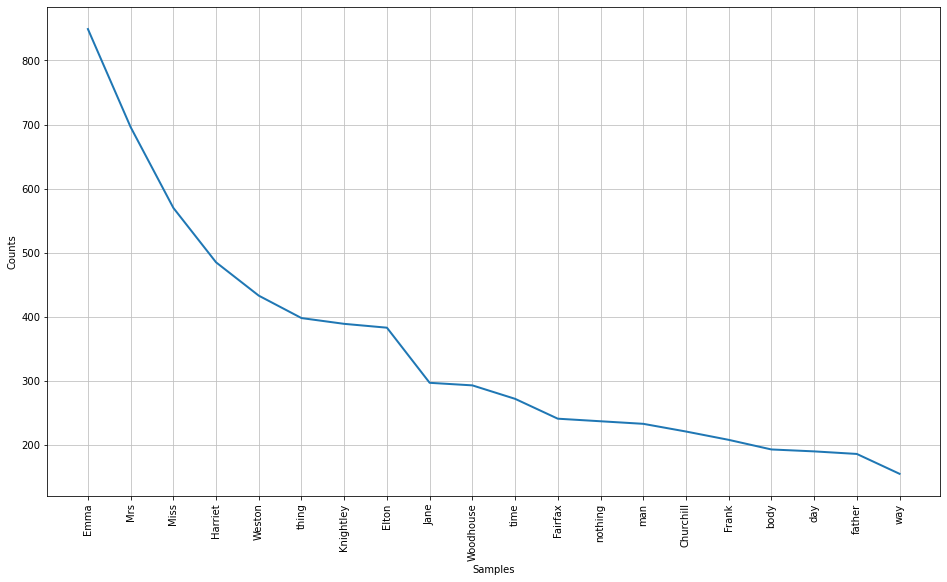

In [22]:
# 최빈 단어 시각화
words = ret.tokenize(emma)

from nltk import Text
emma_text = Text(noun_list)

import matplotlib.pyplot as plt
plt.figure(figsize = (16, 9))
emma_text.plot(20)

plt.show()

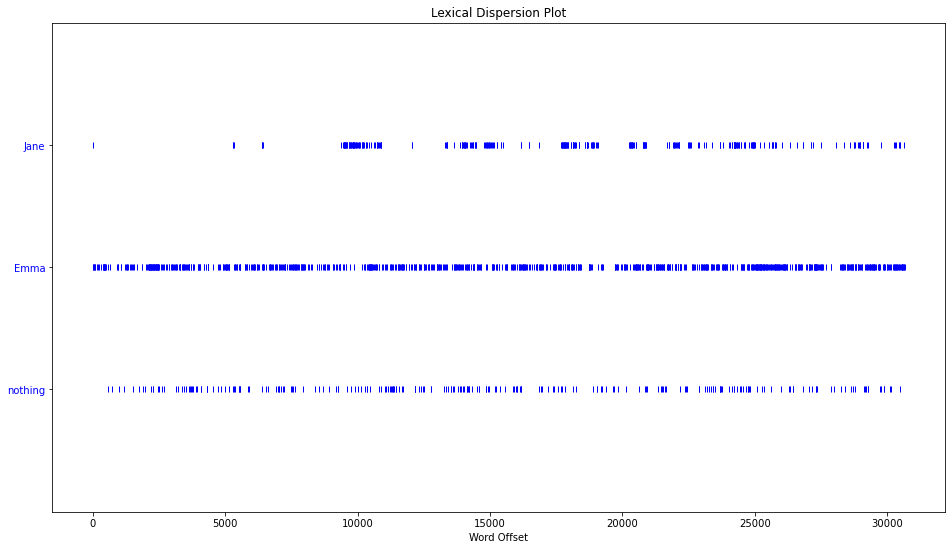

In [23]:
plt.figure(figsize = (16, 9))
emma_text.dispersion_plot(['Jane', 'Emma', 'nothing'])

plt.show()

In [25]:
# 단어 출현 빈도
name_list = [ t[0] for t in emma_tags if (t[1] == 'NNP') | (t[1] == 'NNPS')]
from nltk import FreqDist

FreqDist(name_list)

FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [27]:
# 100번 이상 반복되는 이름 출력
for name, freq in FreqDist(name_list).items():
    if freq >= 150:
        print(name, ':', freq)

Emma : 840
Jane : 295
Woodhouse : 293
Miss : 569
Weston : 433
Mrs : 696
Hartfield : 155
Knightley : 389
Elton : 382
Churchill : 221
Frank : 208
Harriet : 484
Fairfax : 241


In [30]:
# 정렬된 wordcount
dic = dict(FreqDist(name_list))
wordCnt = pd.Series(dic)

wordCnt.sort_values(ascending = False, 
                    inplace   = True)

wordCnt.head(10)

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
dtype: int64

In [31]:
# 150번 이상 출현한 이름들을 정렬해서 출력
wordCnt[wordCnt >= 150]

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64